In [12]:
from itertools import islice
import pandas as pd
import numpy as np
from scipy import stats
from  qgrid import show_grid as show 
import plotly.express as px
import math
import seaborn as sns
from matplotlib import pyplot as plt 
import matplotlib as mpl
from matplotlib.lines import Line2D 
# pd.options.plotting.backend = "plotly"
pd.options.plotting.backend ='matplotlib'

mpl.rcParams['boxplot.boxprops.color'] ='white'
mpl.rcParams['boxplot.boxprops.linewidth']=2
mpl.rcParams['patch.edgecolor']='k'
mpl.rcParams['boxplot.patchartist']= "True"
mpl.rcParams['boxplot.flierprops.marker'] = 'o'
mpl.rcParams['boxplot.flierprops.color'] = 'k'
mpl.rcParams['boxplot.flierprops.markerfacecolor'] = "white"
mpl.rc('xtick', labelsize=28) 
mpl.rc('ytick', labelsize=28) 
mpl.rcParams['text.usetex'] = True


In [6]:
def read_top(filename):
    f= open(filename,'r')
    line = f.readline()
    ts=0
    filename=filename.split("/")[1]
    df=pd.DataFrame(columns=["ts","cmd","time","cpu","timestamp"])
    jvm=filename.split("_")[1]
    benchmark=filename.split("_")[0]
    
    while line != '' :
        if line[:3] == "top":
            
            timestamp = line.split(" ")[2]
            f.readline() # 
            f.readline()
            f.readline()
            f.readline()
            f.readline()
            f.readline()
            thread = f.readline().split()
            while len(thread) >0 : 
                x = {"ts":ts,
                     "jvm":jvm,
                     "benchmark":benchmark,
                     "status":thread[7],
                    "cmd":" ".join(thread[11:]),
                    "time":thread[10],
                    "cpu":thread[8],
                    "timestamp":timestamp
                }
                df=df.append(x,ignore_index=True)
                thread = f.readline().split()
            ts+=0.5
        line = f.readline()
        df["type"]=df["cmd"].apply(lambda row: "node" if row[:4]=="node" else "others")
    return df 

# df =read_top(filename="records/avrora_small_15.0.1-open")

(0.0, 6.3)

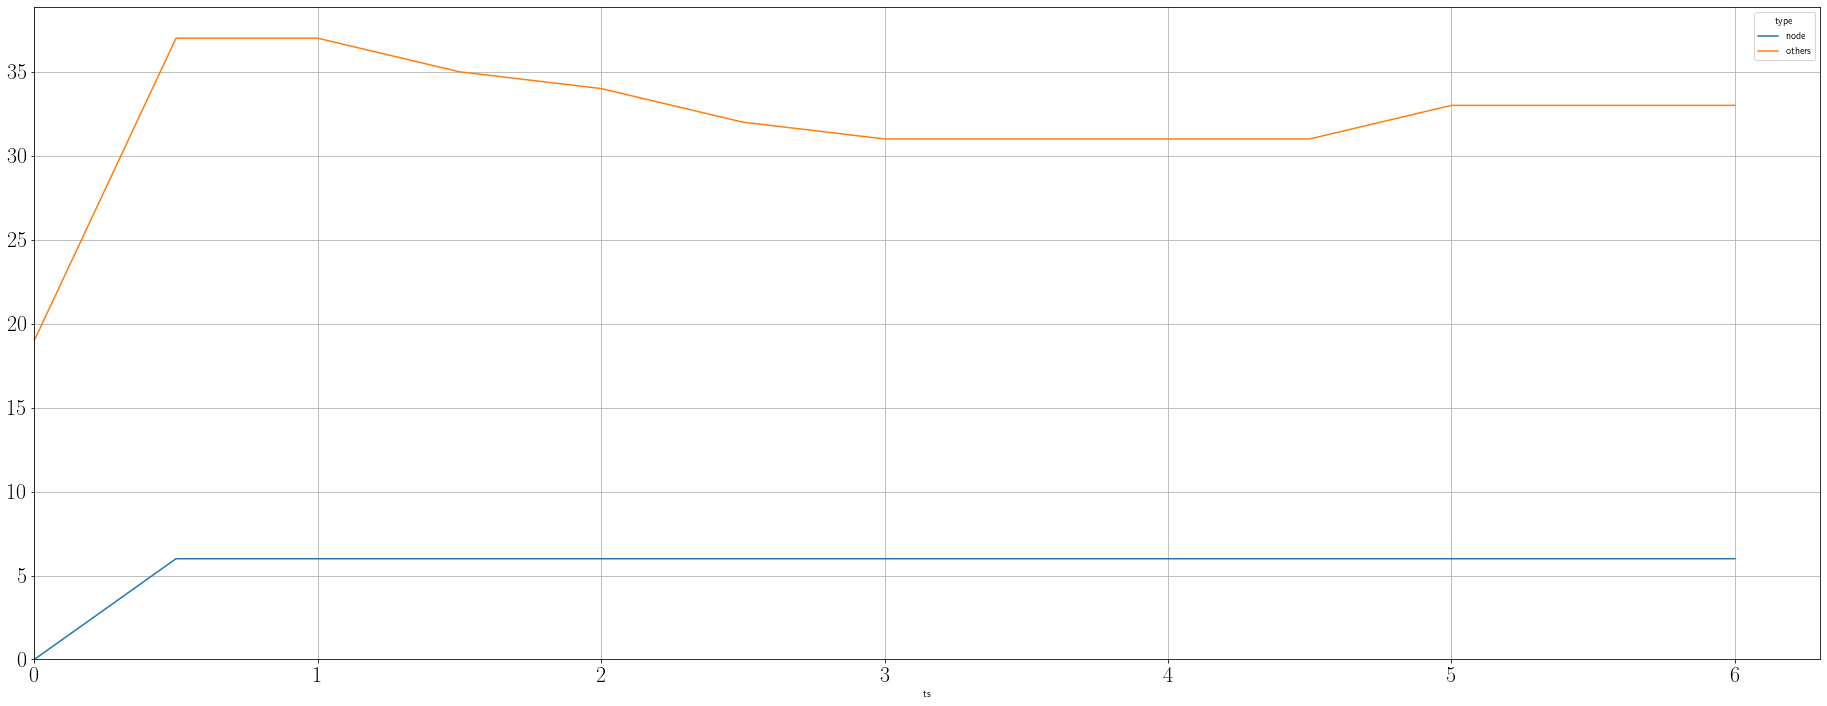

In [65]:
x=df.groupby(["ts","type"]).count().reset_index()
x=x.pivot(index="ts",columns="type",values="cpu").fillna(0)
fig, axes = plt.subplots(1, 1, figsize=(32, 12))
ax=x.plot.line(ax=axes,grid=True)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)

In [148]:
openjdk=read_top("records/avrora_15.0.1-open")
j9=read_top("records/avrora_15.0.1.j9-adpt")
graalvm=read_top("records/avrora_20.2.0.r11-grl")
open8=read_top("records/avrora_8.0.265-open.top")

In [169]:
open8=read_top("records/avrora_8.0.265-open.top")

In [170]:
openjdk["jvm"]="OpenJDK-15"
j9["jvm"]="J9"
graalvm["jvm"]="GraalVM"
open8["jvm"]="OpenJDK-8"

In [171]:
df=pd.concat([openjdk,j9,graalvm,open8])

In [173]:
x=df.loc[df["status"]=="R"].groupby(["ts","jvm","type"]).count().reset_index()
x=x.pivot(index=["ts"],columns=["type","jvm"],values="cpu").reset_index().fillna(0)
x=x.loc[:,["ts","node"]]
x=x.sort_values("ts")

KeyError: 'node'

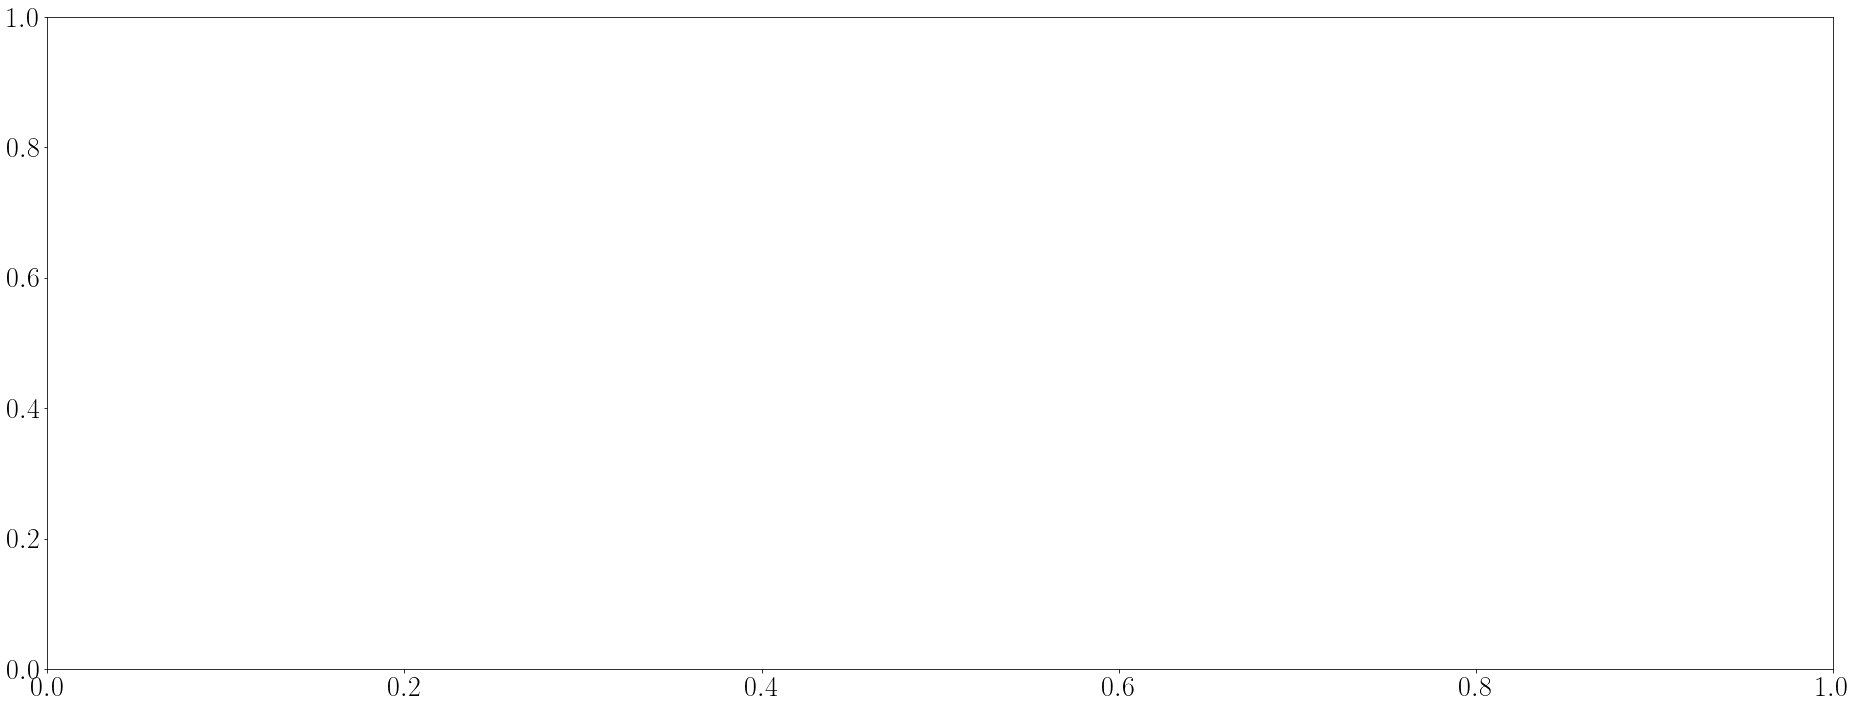

In [21]:
fig, axes = plt.subplots(1, 1, figsize=(32, 12))
axes.plot(x["ts"],x["node"]["J9"],'--',linewidth=3,color="#3498DB",label='J9')
axes.plot(x["ts"],x["node"]["GraalVM"],'-.',linewidth=3,color="#16A085",label='GraalVM')
axes.plot(x["ts"],x["node"]["OpenJDK-15"],'-',linewidth=3,color="#F0B27A",label='OpenJDK-15')
axes.plot(x["ts"],x["node"]["OpenJDK-8"],'-',linewidth=3,color="#ea5f5b",label='OpenJDK-8')

axes.legend(fontsize=25)
ax.set_ylim(bottom=0)
axes.set_ylabel(ylabel="Active Software Threads Count",labelpad=22,fontsize="30")
axes.set_xlabel(xlabel="Time (s)",labelpad=22,fontsize="30")
plt.tight_layout()
plt.savefig("active_therads_count_avrora_large_chetemi_3.pdf",format="pdf")


In [22]:

ax=x.loc[:,["ts","node"]].plot(x="ts",ax=axes,grid=False)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
ax.set_title("effective Threads",size=35)
ax.legend(loc="upper right", prop={'size': 26})


KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['node'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['others'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

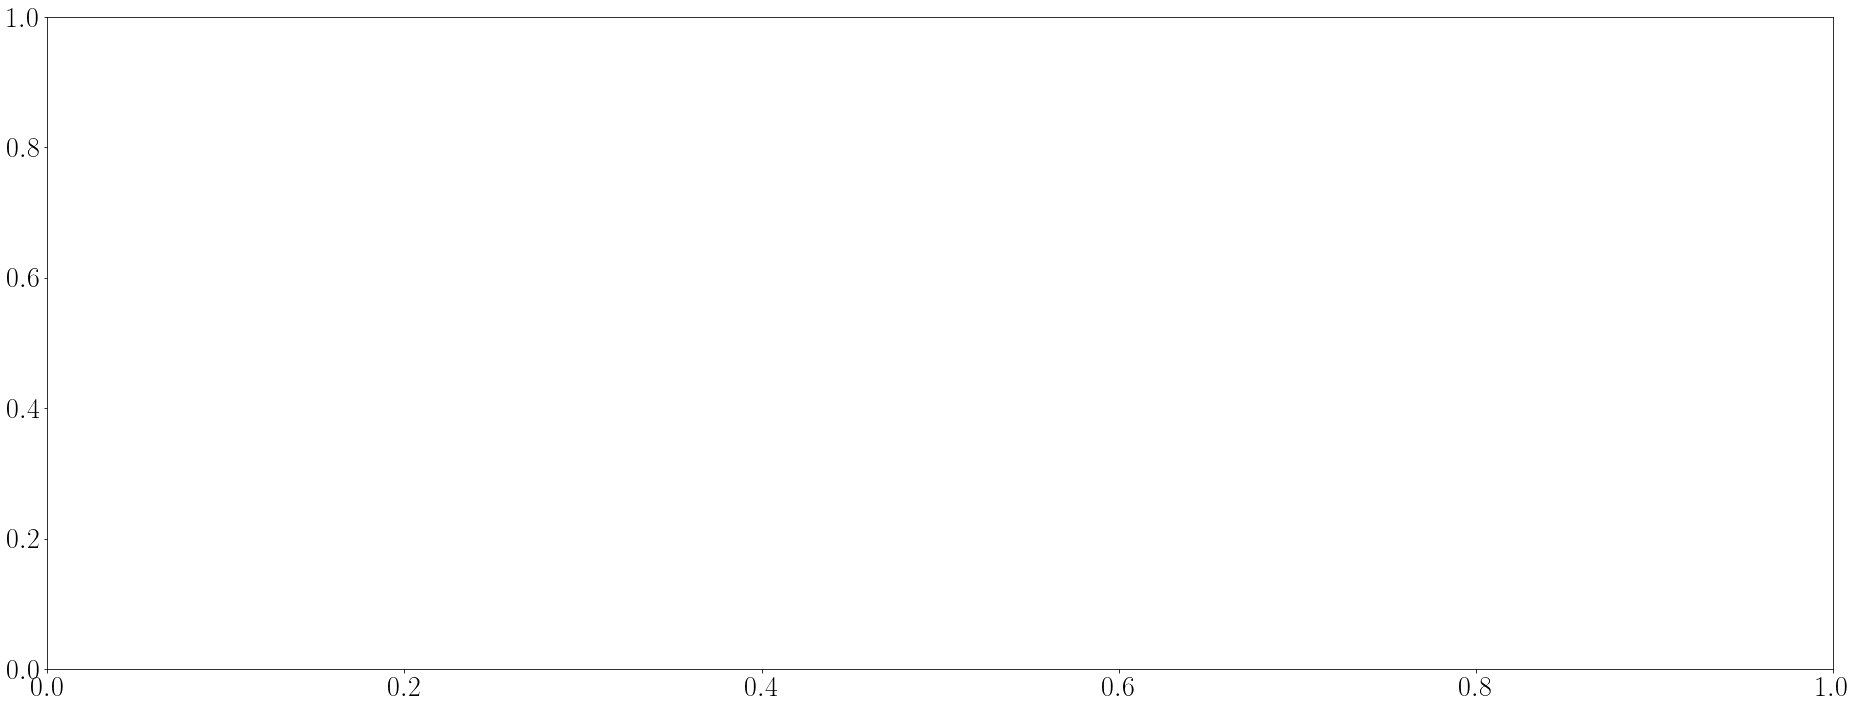

In [23]:

fig, axes = plt.subplots(1, 1, figsize=(32, 12))
ax=x.loc[:,["ts","others"]].plot.line(x="ts",ax=axes,grid=True)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
ax.set_title("Other Threads",size=35)
ax.legend(loc="upper right", prop={'size': 26})

In [24]:
l = !(find new_htop -name "*.top")

In [8]:
data=[read_top(x) for x in l ]

KeyboardInterrupt: 

In [ ]:
data=pd.concat(data)

In [200]:
data.to_csv("all_second_attempt_chetemi-3.csv")

In [25]:
data=pd.read_csv("all_second_attempt_chetemi-3.csv")

In [35]:

def plot_threads(df,benchmark,machine="chetemi_3",save =False ):
    title=f"Number of active Threads in different Jvms over time when executing {benchmark} "
    y=df.loc[df["benchmark"]==benchmark]
    y=y.loc[y["ts"]>1]
    y=y.sort_values("ts")
    y=y.loc[y["status"]=="R"].groupby(["ts","jvm"]).count().reset_index()
    x=y.pivot(index=["ts"],columns=["jvm"],values="cpu").reset_index().fillna(0)

    
    x=x.sort_values("ts")
    ts=x.iloc[len(x)-1]["ts"]+1
    x=x.append({"ts":ts}, ignore_index=True)
    fig, axes = plt.subplots(1, 1, figsize=(32, 12))

    ###### average mean 
    meanj9=y.loc[y["jvm"]=="15.0.1.j9-adpt"]
    meanj9=meanj9["cpu"].sum()/meanj9.iloc[-1]["ts"]/2
    
    meangraal=y.loc[y["jvm"]=="20.2.0.r11-grl"]
    meangraal=meangraal["cpu"].sum()/meangraal.iloc[-1]["ts"]/2
    
    meanopen15=y.loc[y["jvm"]=="15.0.1-open"]
#      return meanopen15
    meanopen15=meanopen15["cpu"].sum()/meanopen15.iloc[-1]["ts"]/2
   
    meanopen8=y.loc[y["jvm"]=="8.0.265-open"]
    meanopen8=meanopen8["cpu"].sum()/meanopen8.iloc[-1]["ts"]/2
    
    
    ######### legends 
    
    
    axes.plot(x["ts"],x["20.2.0.r11-grl"],'-.',linewidth=3,color="#16A085",label=f'GraalVM: {meangraal:1.1f} Thread/s')
    axes.plot(x["ts"],x["15.0.1.j9-adpt"],'--',linewidth=3,color="#3498DB",label=f'OpenJ9: {meanj9:1.1f} Thread/s')
    axes.plot(x["ts"],x["8.0.265-open"],':',linewidth=3,color="#ea5f5b",label=f'HotSpot-8: {meanopen8:1.1f} Thread/s')
    axes.plot(x["ts"],x["15.0.1-open"],'-',linewidth=3,color="#F0B27A",label=f'HotSpot-15: {meanopen15:1.1f} Thread/s')
    
    axes.legend(fontsize=25,loc='center right')
    axes.set_ylim(bottom=0)
    axes.set_ylabel(ylabel="Active Software Threads Count",labelpad=22,fontsize="30")
    axes.set_xlabel(xlabel="Time (s)",labelpad=22,fontsize="30")
    plt.tight_layout()
    if save :
        axes.set_title("",fontsize="30",pad=50  )
        plt.savefig(f"active_threads_{benchmark}_{machine}.pdf",format="pdf")
    else:
        axes.set_title(title,fontsize="40",pad=50  )
        plt.show()
    return fig



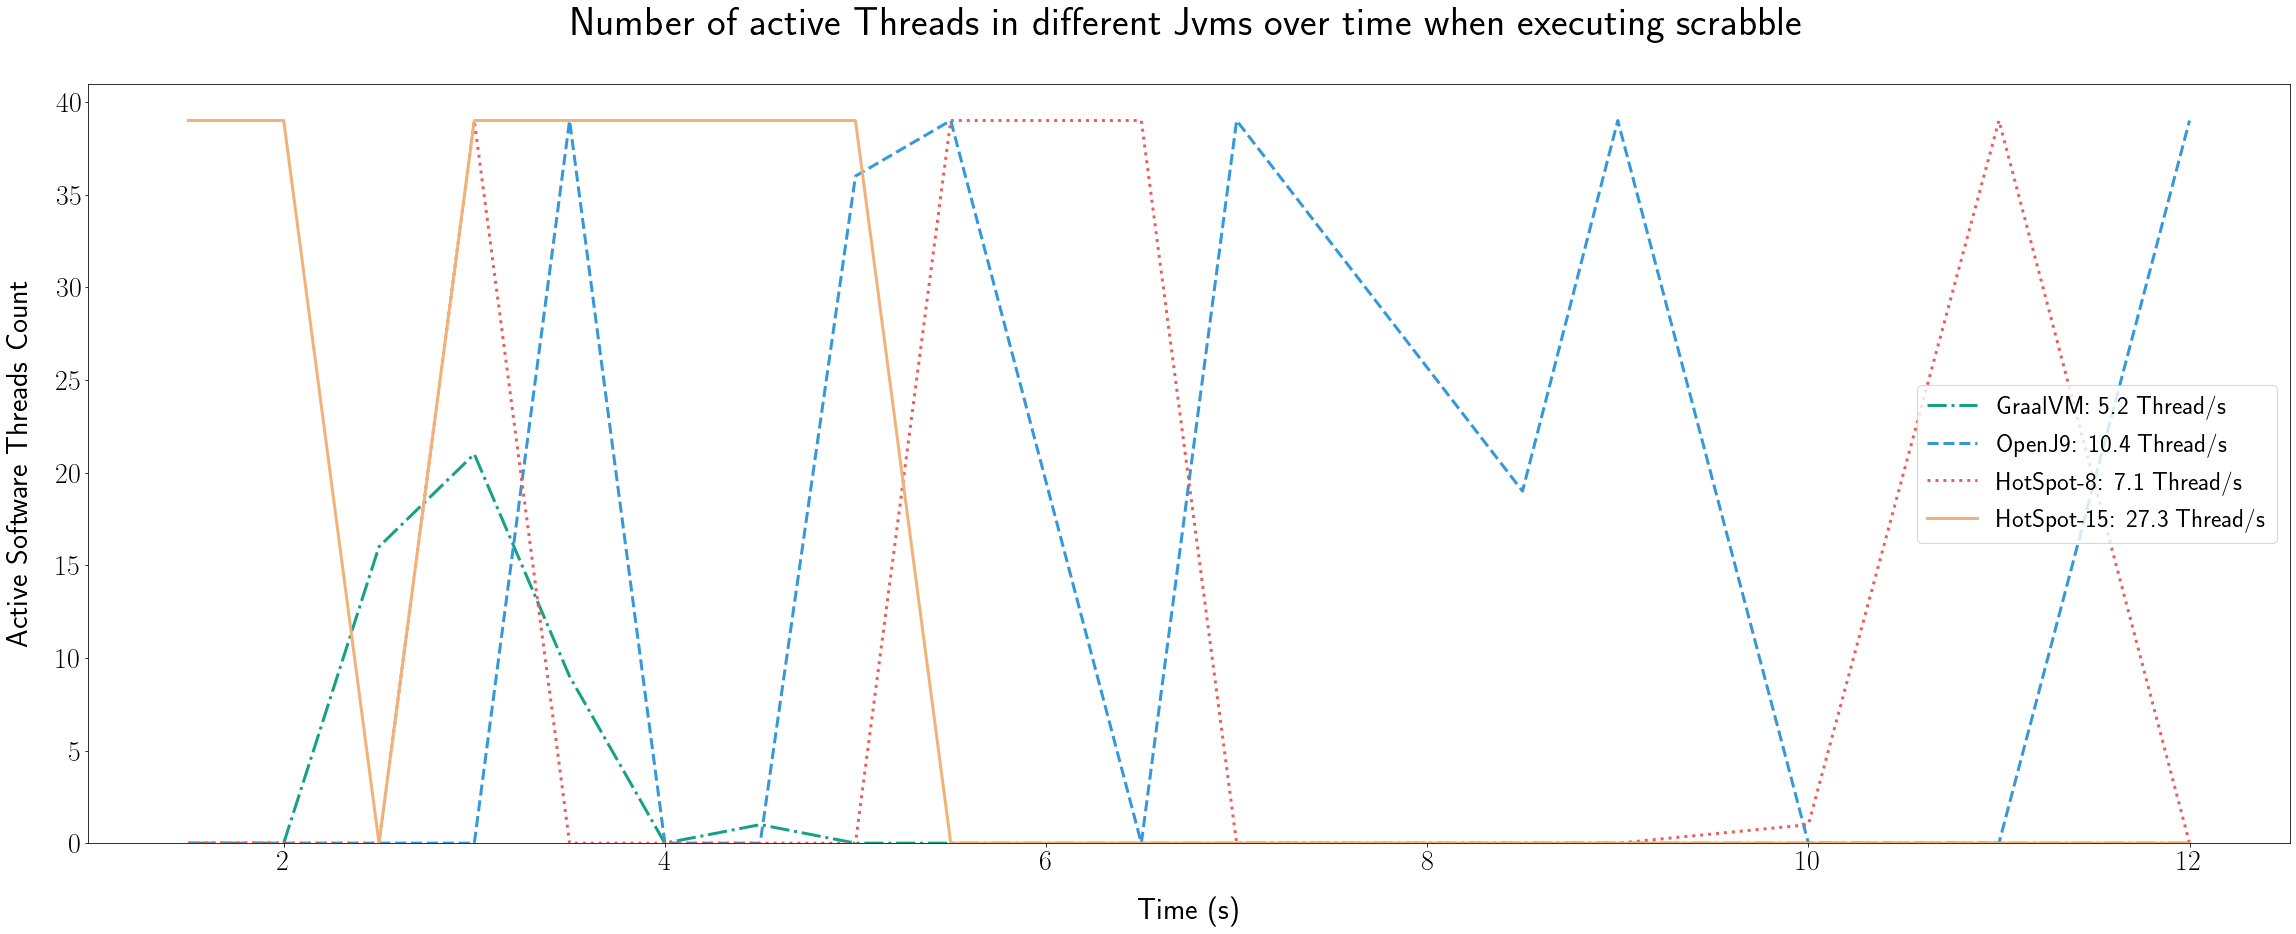

In [36]:
s=plot_threads(x,"scrabble")

In [18]:
import re

In [19]:
benchmakrs=data.benchmark.unique()
x=data.loc[data["cmd"].str.match("node|reactor|Thread|ForkJoin",re.IGNORECASE)]

[<Figure size 2304x864 with 1 Axes>,
 <Figure size 2304x864 with 1 Axes>,
 <Figure size 2304x864 with 1 Axes>,
 <Figure size 2304x864 with 1 Axes>]

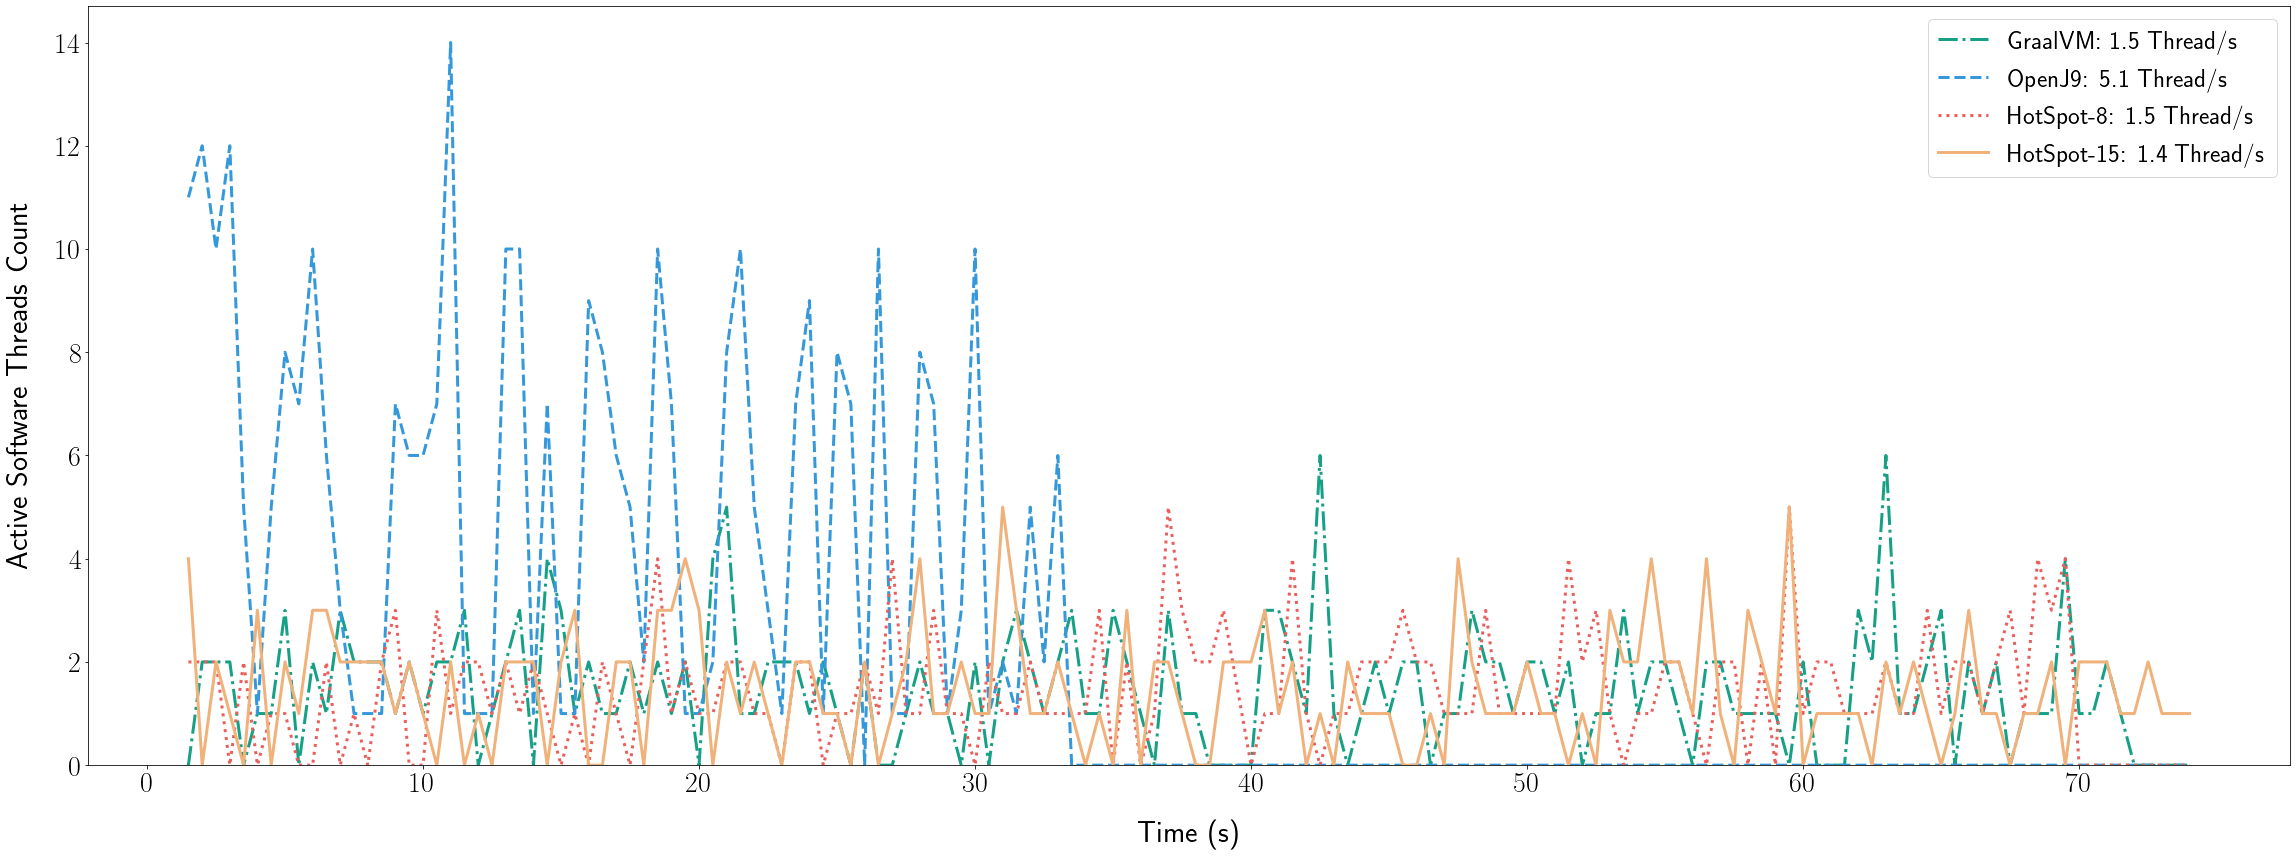

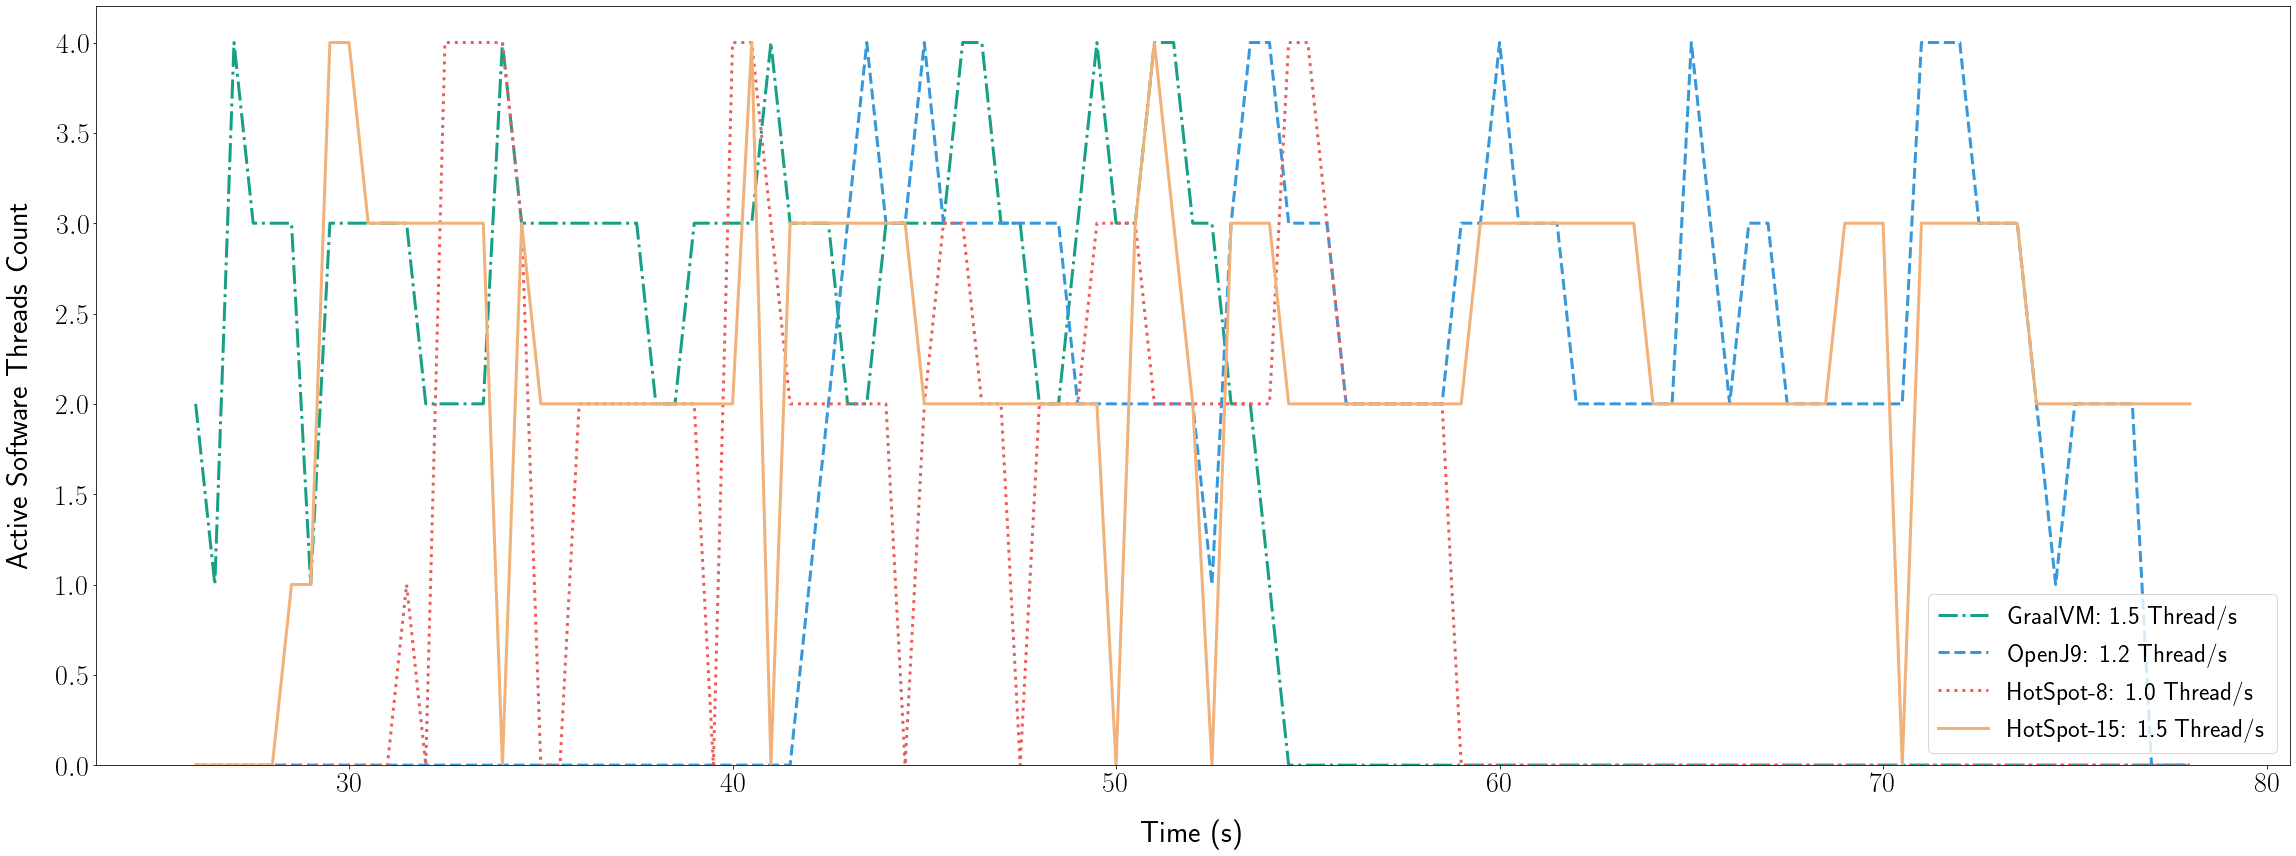

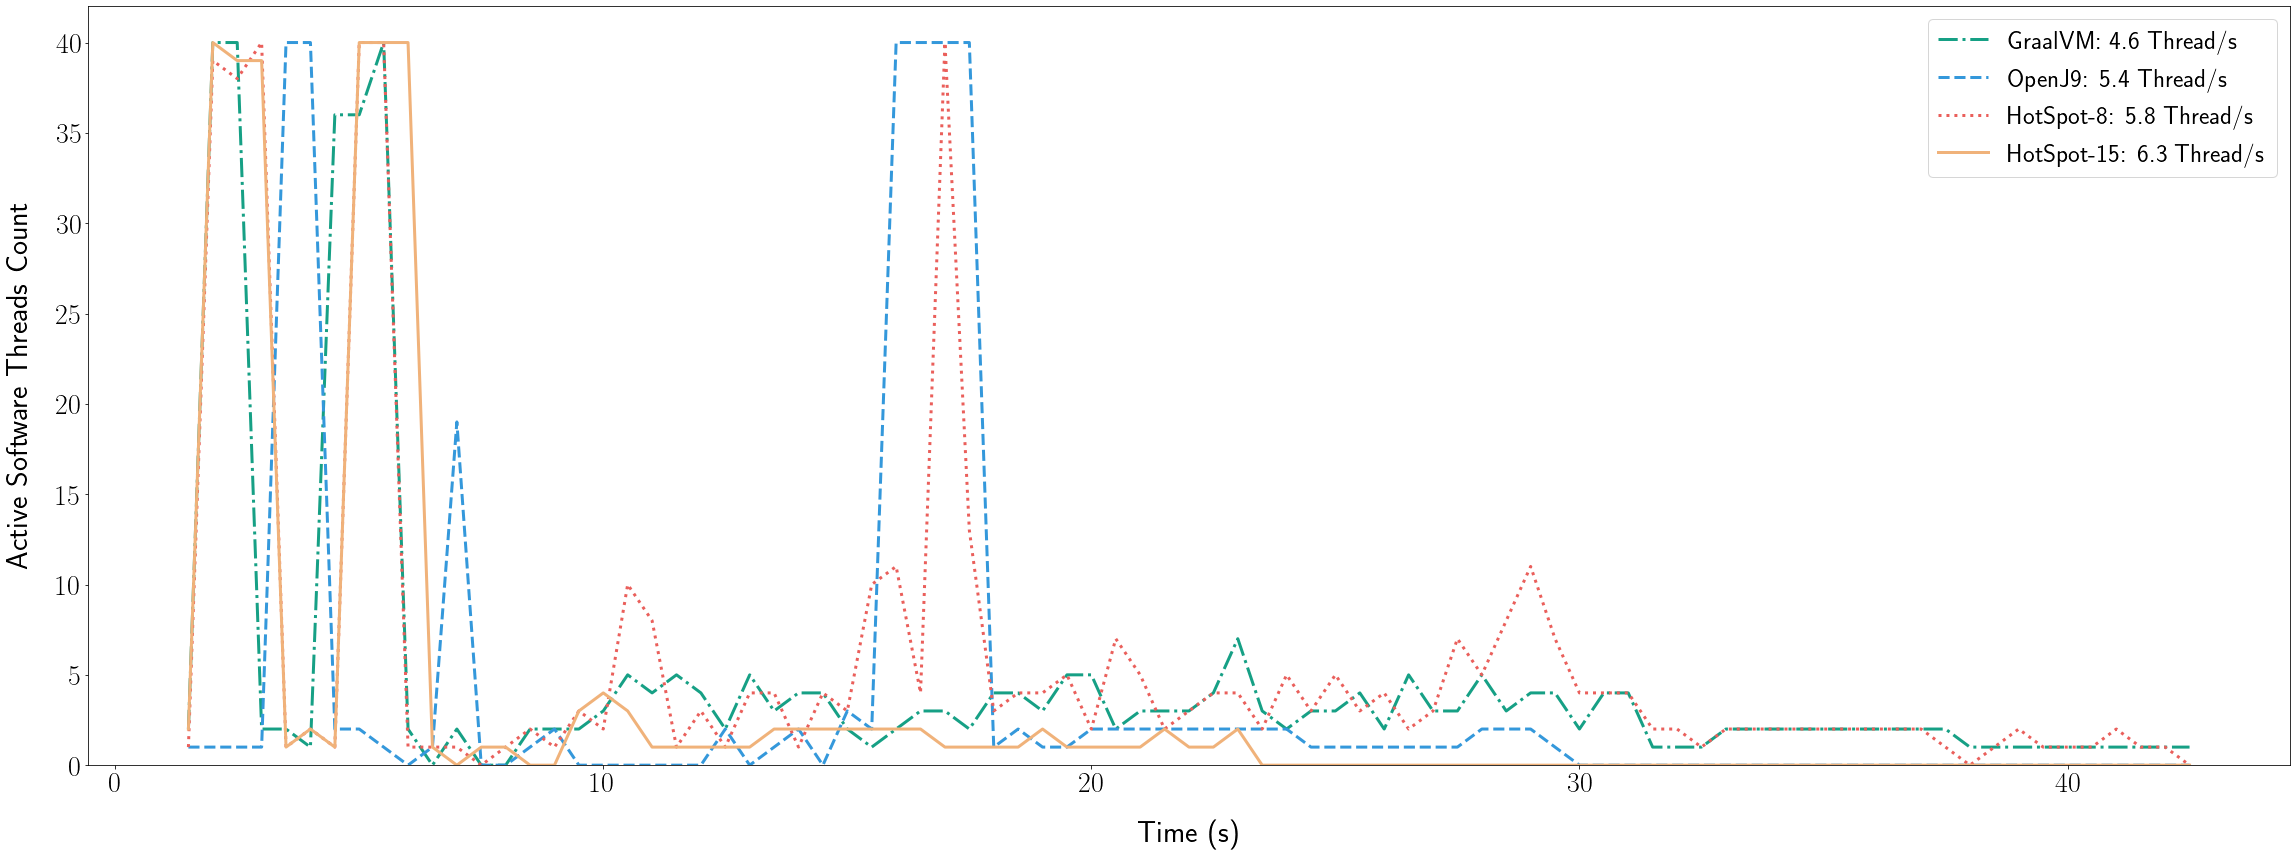

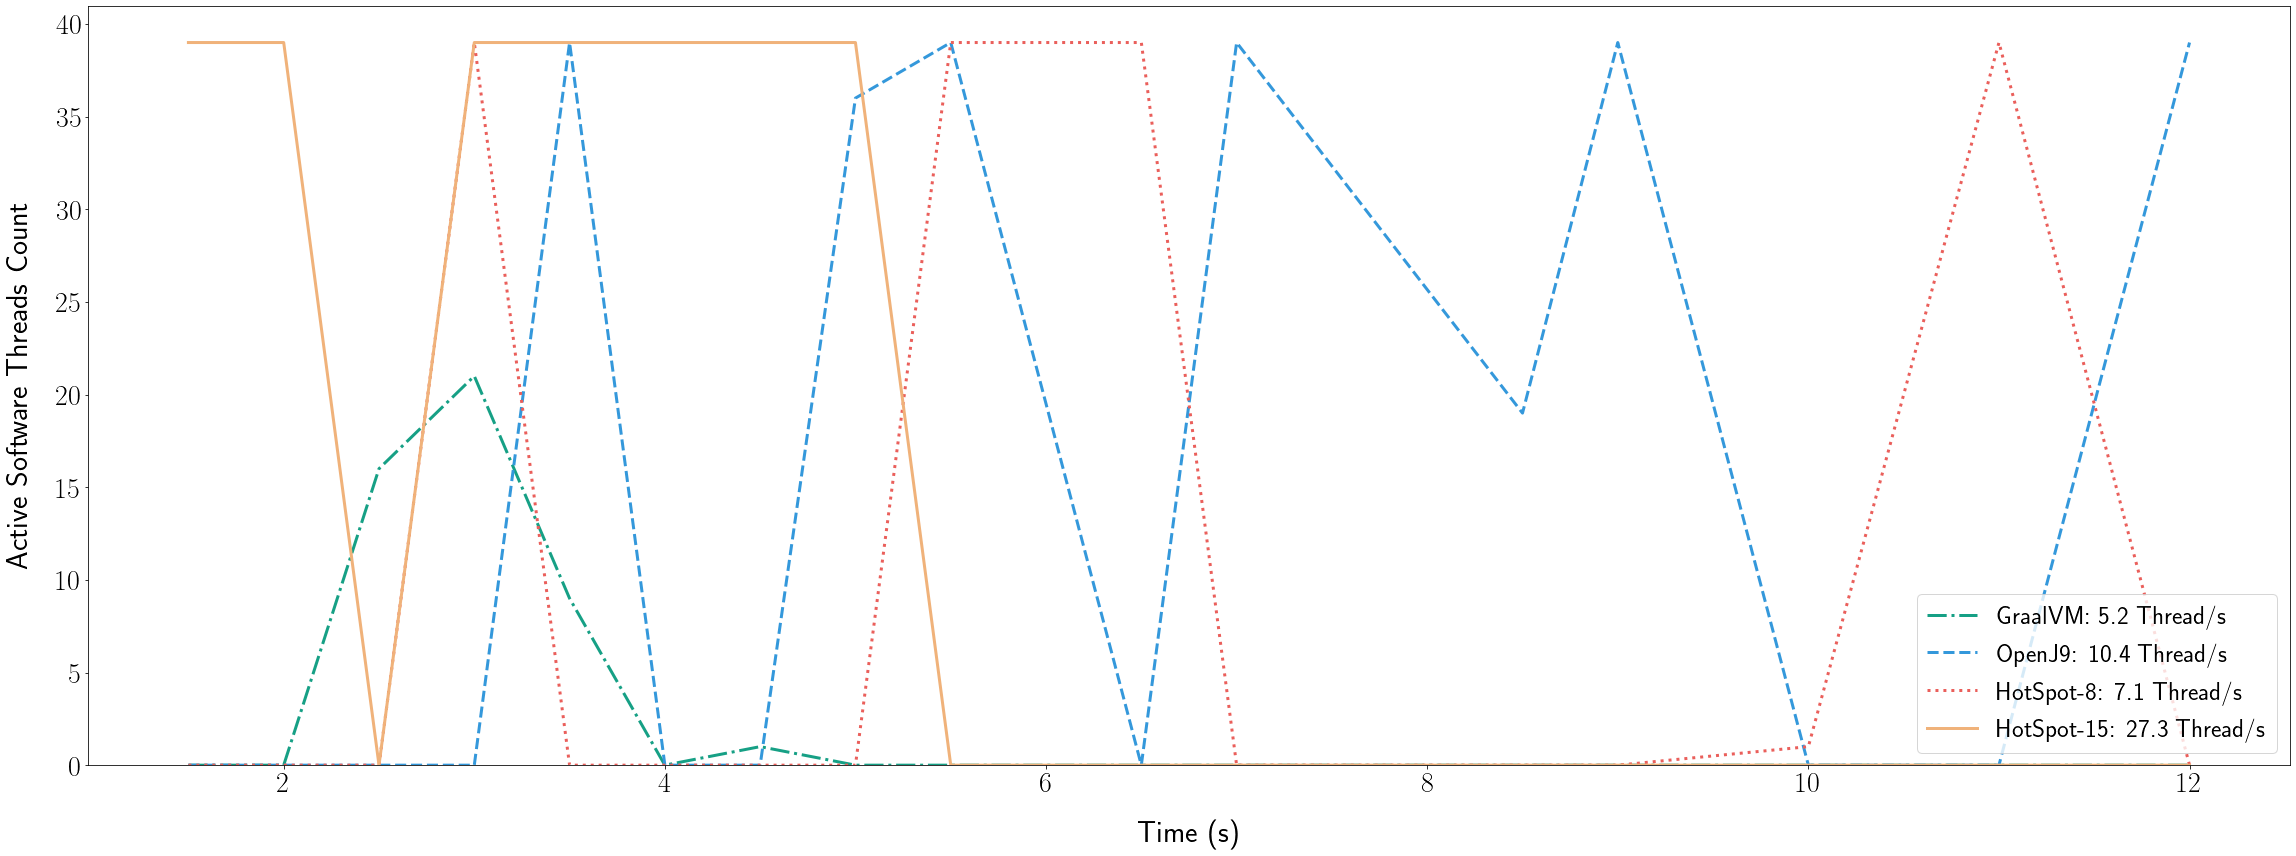

In [34]:
[plot_threads(x,i,"chetemi_3",True)for i in data.benchmark.unique()]